In [ ]:
# default_exp system_response

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from importing_modules import *

In [ ]:
%matplotlib inline

# System Response

This notebook analyses how different systems might respond to different classes of inputs.

-----------------------

## The Dominant Pole Approximation

Lower order (1st and 2nd) are weel understood and easy to characterize (speed of system, oscillations, damping…, but his is much more difficult with higher order systems. 

One way to make many such systems easier to think about is to approximate the system by a lower order system using a technique called the dominant pole approximation. This approximation assumes that the slowest part of the system dominates the response, and that the faster part(s) of the system can be ignored.

Let's take some examples and verify how a few systems behaves.

We will use Sympy to do it, so we need to define some variables first.

In [ ]:
t, K, tau = sympy.symbols('t, K, tau',real=True, positive=True)
s = sympy.Symbol('s')
u = sympy.Heaviside(t)

def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
def evaluate(f, times):
    res = []
    for time in times:        
        res.append(f.evalf(subs={t:time}).n(chop=1e-5))
    return res

In [ ]:
q1 = (-1.53283653303955 + 6.08703605256546e-17*sympy.I)
q2 = (-1.53283653303955 + 6.08703605256546e-5*sympy.I)

print(q1.n(chop=1e-5))
print(q2.n(chop=1e-5))

-1.53283653303955
-1.53283653303955 + 6.08703605256546e-5*I


- When we have a BIBO stable system, every mode of the system is an exponentially dumped signal.
- Beyond the initial transient, the main effect is driven by the slowest modes

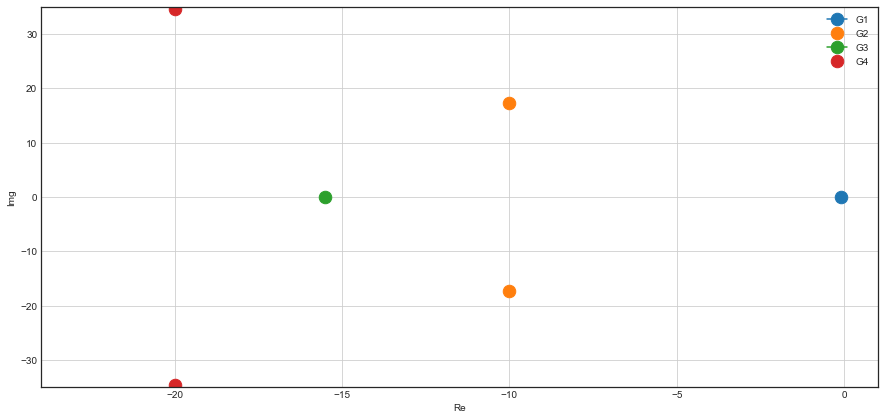

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,7))

plt.plot(-0.1, 0, marker='.', markersize=25)
plt.plot([-10, -10], [-17.32, 17.32], marker='.', markersize=25, linestyle='')
plt.plot(-15.5, 0, marker='.', markersize=25)
plt.plot([-20, -20], [-34.64, 34.64], marker='.', markersize=25, linestyle='')

axs.set_xlim([-24, 1])
axs.set_ylim([-35, 35])
axs.set_xlabel('Re')
axs.set_ylabel('Img')

plt.legend(['G1', 'G2', 'G3', 'G4'])
plt.grid()


We can now verify what output is associated to each of these systems:

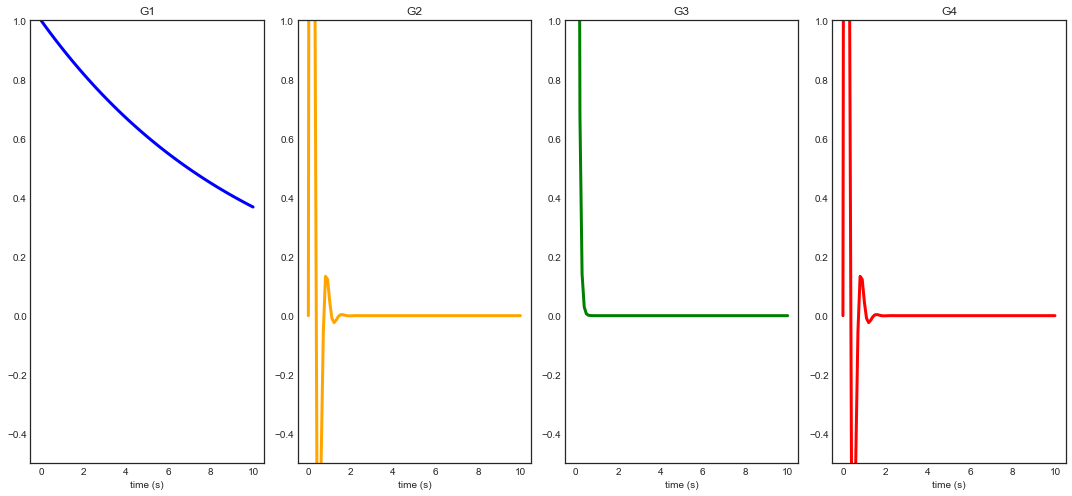

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(15,7))

time = np.linspace(0,10,100)

# Define our systems
G1 = 1/(s + 0.1)
zeta, w_n = 0.5, 10
G2 = w_n**2/(s**2 + 2*zeta*w_n*s + w_n**2)
G3 = 15.5/(s + 15.5)
zeta, w_n = 0.5, 10
G4 = w_n**2/(s**2 + 2*zeta*w_n*s + w_n**2)

axs[0].plot(time, evaluate(invL(G1), time), color='blue', linewidth=3), axs[0].set_ylim(-.5, 1), axs[0].set_title('G1'), axs[0].set_xlabel('time (s)')
axs[1].plot(time, evaluate(invL(G2), time), color='orange', linewidth=3), axs[1].set_ylim(-.5, 1), axs[1].set_title('G2'), axs[1].set_xlabel('time (s)')
axs[2].plot(time, evaluate(invL(G3), time), color='green', linewidth=3), axs[2].set_ylim(-.5, 1), axs[2].set_title('G3'), axs[2].set_xlabel('time (s)')
axs[3].plot(time, evaluate(invL(G4), time), color='red', linewidth=3), axs[3].set_ylim(-.5, 1), axs[3].set_title('G4'), axs[3].set_xlabel('time (s)')

fig.tight_layout()

- Depending on how far they are in the $s$ plane their influence in time is different. 
- **Beyond the initial transient, the slower modes are those the matter**

### Example 1, second order

Let's consider when we have:

In [ ]:
G1 = 0.1/(s+0.1)
G2 = 1/(s+1)

In this case, one pole is 10 times bigger than the other. The entire system is:

In [ ]:
G = G1*G2
print(G)

0.1/((s + 0.1)*(s + 1))


And we can plot their output:

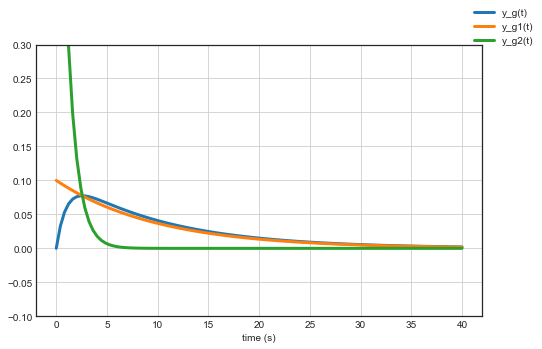

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

time = np.linspace(0,40,100)

ax.plot(time, evaluate(invL(G), time), linewidth=3)
ax.plot(time, evaluate(invL(G1), time), linewidth=3)
ax.plot(time, evaluate(invL(G2), time), linewidth=3)

ax.set_ylim(-.1, 0.3)
ax.set_xlabel('time (s)')
ax.grid()
fig.legend(['y_g(t)', 'y_g1(t)', 'y_g2(t)']);

And we can also calculate the step response:

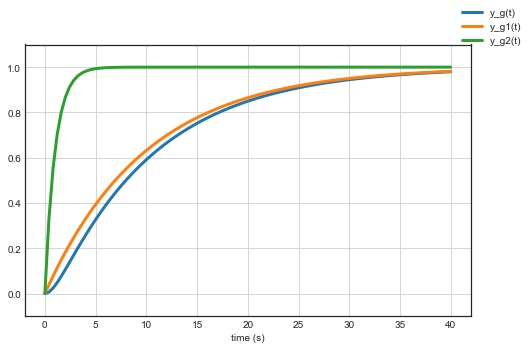

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

time = np.linspace(0,40,100)

ax.plot(time, evaluate(invL(G*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G1*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G2*1/s), time), linewidth=3)

ax.set_ylim(-.1, 1.1)
ax.set_xlabel('time (s)')
ax.grid()
fig.legend(['y_g(t)', 'y_g1(t)', 'y_g2(t)']);

The system $$G(s) = \frac{0.1}{(s+0.1)(s+1)} \approx \frac{0.1}{(s+0.1)}$$

### Example 2, Second order, Pole dominates but not as strongly

In [ ]:
G1 = 0.2/(s+0.2)
G2 = 1/(s+1)
G=G1*G2
print('G:', G)

G: 0.2/((s + 0.2)*(s + 1))


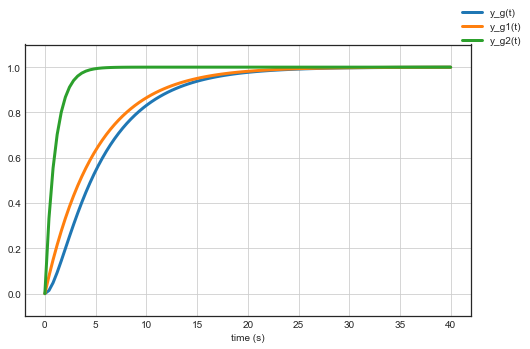

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

time = np.linspace(0,40,100)

ax.plot(time, evaluate(invL(G*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G1*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G2*1/s), time), linewidth=3)

ax.set_ylim(-.1, 1.1)
ax.set_xlabel('time (s)')
ax.grid()
fig.legend(['y_g(t)', 'y_g1(t)', 'y_g2(t)']);

## Example 3, Second Order, neither pole dominates

In [ ]:
G1 = 1.25/(s+1.25)
G2 = 1/(s+1)
G=G1*G2
print('G:', G)

G: 1.25/((s + 1)*(s + 1.25))


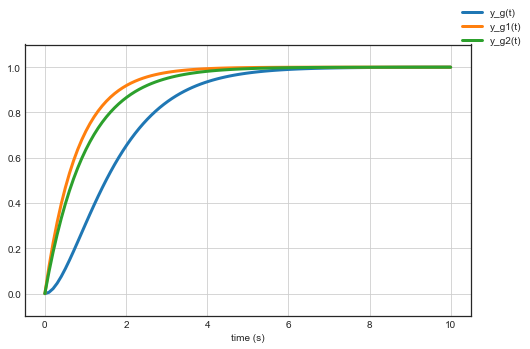

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

time = np.linspace(0,10,100)

ax.plot(time, evaluate(invL(G*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G1*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G2*1/s), time), linewidth=3)

ax.set_ylim(-.1, 1.1)
ax.set_xlabel('time (s)')
ax.grid()
fig.legend(['y_g(t)', 'y_g1(t)', 'y_g2(t)']);

### Simplifying Higher Order System

The dominant pole approximation can also be applied to higher order systems. Here we consider a third order system with one real root, and a pair of complex conjugate roots.

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/25.3rd-order-dominant-poles.png" alt="25.3rd-order-dominant-poles" style="width: 600px;"/> </td>        
    </tr>
</table>



- In this case the test for the dominant pole compare $\alpha$ against $\xi \omega_n$. 
- This is because $\xi \omega_n$ is the real part of the complex conjugate root 
- We only compare the real parts of the roots when determining dominance because it is the real part that determines how fast the response decreases.
- Note, that as with the previous case, that the DC gain of the exact system and the two approximate systems are equal. Note, again, that H(0) is unchanged for the exact and approximate transfer funtions. This is necessary to ensure that the final value of the step response (which is determined by H(0) is unchanged).

## Example 5, Third order, Real Pole Dominates

In [ ]:
alpha = 0.1 # real pole that dominates

$$G(s) = \frac{\alpha \omega_n^2}{(s+\alpha)(s^2+2\xi\omega_n s + \omega_n^2)} = \frac{17}{(s+1)(s^2+2s+17)}$$

$$ \approx G_dp(s) = \frac{\alpha}{s+\alpha} = \frac{0.1}{s+0.1}$$

In [ ]:
G1 = 0.1/(s+0.1)
G2 = 17/(s**2+2*s+17)

G=G1*G2
print('G:', G)

G: 1.7/((s + 0.1)*(s**2 + 2*s + 17))


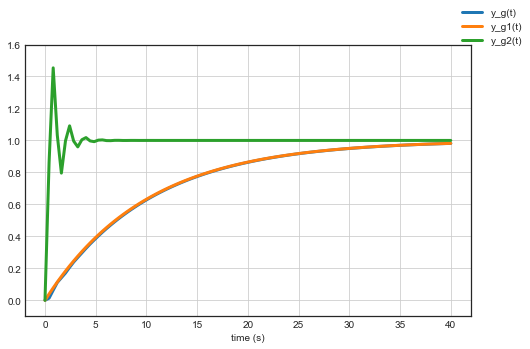

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

time = np.linspace(0,40,100)

ax.plot(time, evaluate(invL(G*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G1*1/s), time), linewidth=3)
ax.plot(time, evaluate(invL(G2*1/s), time), linewidth=3)

ax.set_ylim(-.1, 1.6)
ax.set_xlabel('time (s)')
ax.grid()
fig.legend(['y_g(t)', 'y_g1(t)', 'y_g2(t)']);

**Dominant pole approximation can simplify systems analysis**

The dominant pole approximation is a method for approximating a (more complicated) high order system with a (simpler) system of lower order if the location of the real part of some of the system poles are sufficiently close to the origin compared to the other poles.

--------------------

## First-order and second-order systems

- Given that the main effect is driven by the slowest modes, then the dynamics of the system can be approximated by the modes associated to the dominant poles
- Typically this ends up being a first-order system (real dominant pole) or a second-oder system (complex-conjugated poles), possibly with a constant delay
- It is hence important to understand the response of the first-order and second-order systems as they can be representive of a broader class.

### Step response of first order systems

Given a system: 
$$G(s) = \frac{1}{1+\tau s}$$

with pole in $s = \frac{-1}{\tau} $

and given a input: $$u(t) = 1(t)$$ 

the output of the system is:
$$ y(t) = 1 - e^{-\frac{t}{\tau}}$$

This is obtained:

$$\frac{1}{1+\tau s}\frac{1}{s} = \frac{1/\tau}{s + 1/\tau} \frac{1}{s} = \frac{A}{s + 1/\tau} + \frac{B}{s}$$

where $A = -1$, $B = 1$

We can verify it with Sympy:

In [ ]:
F = 1/(K*s + 1)*1/s
invL(F)

We can then plot the output $y(t)$:

In [ ]:
time = np.linspace(0,20,100)

tau = 2

y_t = 1 - np.exp(-time/tau)

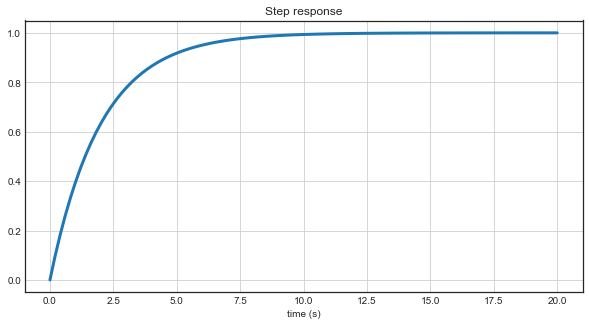

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(time, y_t, linewidth=3)
plt.title('Step response')
plt.xlabel('time (s)')
plt.grid()

We call:

- $\tau$: time constant - Characterises completely the response of the system
- Settling time: the time it takes to get to 95% (or other times 90%, 98%) of the steady state value:
    - $t_s = -\tau ln(0.05)$

In [ ]:
#y_t = -1 # Desired steady state value
final_value_pc = 0.95 # percentage of y_t

# final_value = 1 - np.exp(-t/tau)
# np.log(1-final_value) = -t/tau

t_s = -tau*np.log(1-final_value_pc)

print('Time to get to {}% of final value {:.1f}: {:.2f}s'.format(final_value_pc, y_t[-1], t_s))

Time to get to 0.95% of final value 1.0: 5.99s


Note that, after $\tau$ seconds, the system gets to the $64\%$ of the final value

To recap:

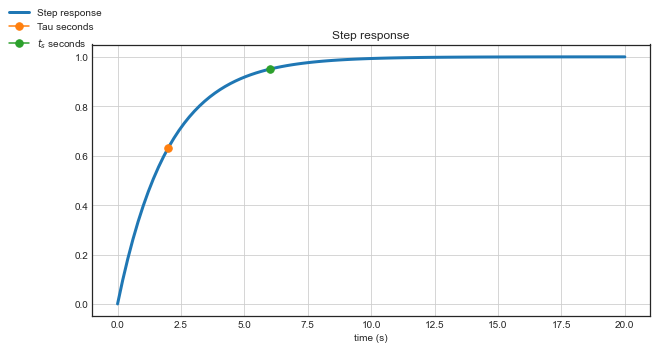

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(time, y_t, linewidth=3)
plt.plot(tau, 1 - np.exp(-tau/tau), marker='.', markersize=15)
plt.plot(t_s, final_value_pc*y_t[-1], marker='.', markersize=15)
fig.legend(['Step response', 'Tau seconds', '$t_s$ seconds'], loc='upper left')

plt.title('Step response')
plt.xlabel('time (s)')
plt.grid()

### Step response of second order systems

Given a system: 
$$G(s) = \frac{1}{\frac{s^2}{w_n^2} + \frac{2\xi}{w_n}s + 1}$$

with $ 0 < \xi < 1 $

The system has two conjugate-complex poles:

 $$s = -\xi w_n \pm j \sqrt{1-\xi^2} $$
 

As before, we can calculate the step reponse:

- input $u(t)=1(t)$
- output $y(t) = 1 - \frac{1}{\sqrt{1-\xi^2}} e^{-\xi w_n t} sin( w_n\sqrt{1-\xi^2}t + arccos(\xi))$

Let's plot it:

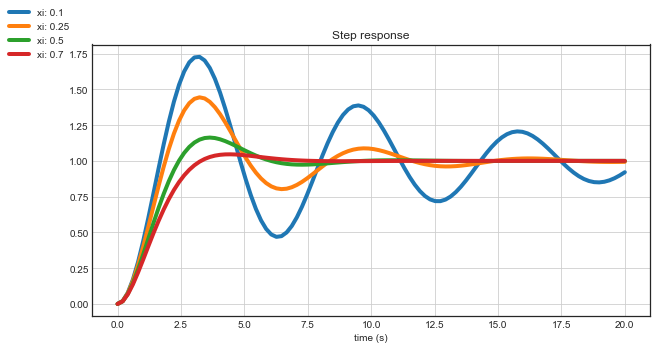

In [ ]:
xis = [0.1, 0.25, 0.5, 0.7]
wn = 1

fig = plt.figure(figsize=(10,5))
legend_strs = []
for xi in xis:
    y_t = 1 - (1/np.sqrt(1-xi**2)) * np.exp(-xi*wn*time) * np.sin(wn*np.sqrt(1-xi**2)*time+np.arccos(xi))
    plt.plot(time, y_t, linewidth=4)
    legend_strs.append('xi: ' + str(xi))

fig.legend(legend_strs, loc='upper left')

plt.title('Step response')
plt.xlabel('time (s)')
plt.grid()

There are a few notable points that we can identify for the response of a second order system:

- Maximum overshoot: $$ S \% = 100 e^{\Large -\frac{\xi\pi}{\sqrt{1-\xi^2}}} $$

- Time of Maximum overshoot: $$t_{max} = \frac{\pi}{w_n\sqrt{1-\xi^2}} $$

- Settling time (within a desired interval, e.g., 5%): $$t_{s} \sim -\frac{1}{\xi w_n}ln(0.05) $$

- Oscillation period: $$T_{P} = \frac{2\pi}{w_n\sqrt{1-\xi^2}} $$

Let's see where they are on the plot:

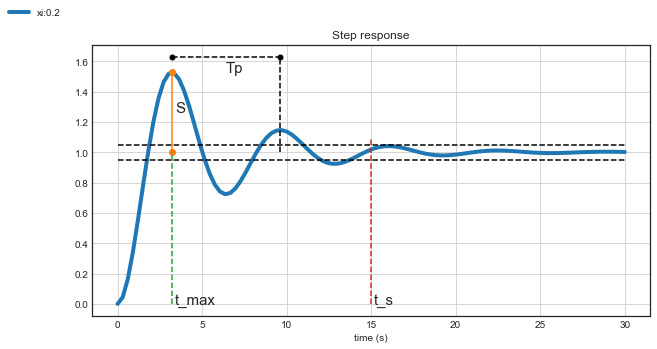

In [ ]:
time = np.linspace(0,30,100)
xi = 0.2
wn = 1

# Maximum overshoot
S = np.exp(-xi*3.14/(np.sqrt(1-xi**2)))
# Time of maximum overshoot
t_max = 3.14/(wn*np.sqrt(1-xi**2))
# Settling time within 5%
t_s = -1/(xi*wn)*np.log(0.05)
# Period of the oscillations
Tp = 2*3.14/(wn*np.sqrt(1-xi**2))


fig = plt.figure(figsize=(10,5))
y_t = 1 - (1/np.sqrt(1-xi**2)) * np.exp(-xi*wn*time) * np.sin(wn*np.sqrt(1-xi**2)*time+np.arccos(xi))
plt.plot(time, y_t, linewidth=4)

plt.plot([t_max, t_max], [y_t[-1], y_t[-1]+S], marker='.', markersize=12)
plt.text(t_max+0.2, y_t[-1]+S/2, 'S', fontsize=15)

plt.plot([t_max, t_max], [0, 1], markersize=12, linestyle='--')
plt.text(t_max+0.2, 0.0, 't_max', fontsize=15)

plt.plot([0, time[-1]], [1-0.05, 1-0.05], linestyle='--', color='k')
plt.plot([0, time[-1]], [1+0.05, 1+0.05], linestyle='--', color='k')
plt.plot([t_s, t_s], [0, 1.1], linestyle='--')
plt.text(t_s+0.2, 0.0, 't_s', fontsize=15)


plt.plot([t_max, t_max+Tp], [y_t[-1]+S+0.1, y_t[-1]+S+0.1], marker='.', linestyle='--', color='k', markersize=10)
plt.plot([t_max+Tp, t_max+Tp], [y_t[-1], y_t[-1]+S+0.1], linestyle='--', color='k')
plt.text((t_max+t_max+Tp)/2, y_t[-1]+S, 'Tp', fontsize=15)

fig.legend(['xi:{:.1f}'.format(xi)], loc='upper left')

plt.title('Step response')
plt.xlabel('time (s)')
plt.grid()

---------------------